In [1]:
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from ipynb.fs.full.functions_fk_tec_project import zodiac_sign, won_draw_lost

In [2]:
path_squad = pathlib.Path('Data files [csv]\squad.csv')
path_attendance = pathlib.Path('Data files [csv]\\attendance.csv')
path_games = pathlib.Path('Data files [csv]\games.csv')
path_statistics = pathlib.Path('Data files [csv]\statistics.csv') 
path_stadiums = pathlib.Path('Data files [csv]\stadiums.csv')

In [3]:
df_squad = pd.read_csv(path_squad, low_memory=False)
df_squad

,Name_Surname,Date_of_birth,Position,Season
0,Maksimas Bechterevas,1981-06-05 [39 m.],Vartininkas,2016
1,Povilas Frankas,1985-08-06 [34 m.],Vartininkas,2016
2,Robert Choruzij,1996-07-15 [24 m.],Vartininkas,2016
3,Justas Macidulskas,1998-04-30 [22 m.],Vartininkas,2016
4,Tadas Jacinavičius,1987-06-01 [33 m.],Gynėjas,2016
...,...,...,...,...
131,Laurynas Zibolis,1979-12-14 [40 m.],Puolėjas,2019
132,Valdemar Šaveiko,1992-02-21 [28 m.],Puolėjas,2019
133,Alvinas Dūdėnas,1988-06-11 [32 m.],Puolėjas,2019
134,Domantas Gegevičius,1997-07-11 [23 m.],Puolėjas,2019


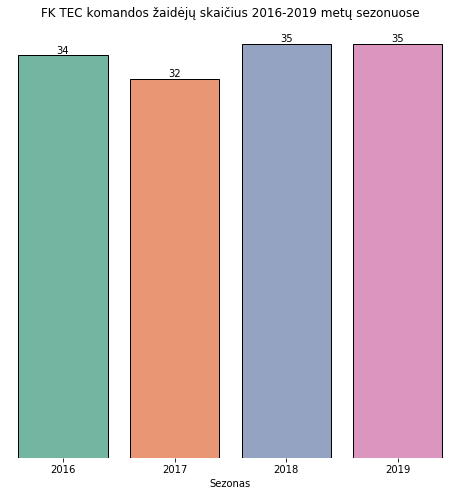

In [4]:
plt.figure(figsize=(8,8))
squad_count_season = sns.barplot(x=df_squad['Season'].value_counts().index, y=df_squad['Season'].value_counts(), edgecolor='black', palette='Set2')
squad_count_season.set(title = 'FK TEC komandos žaidėjų skaičius 2016-2019 metų sezonuose', xlabel = 'Sezonas', ylabel = 'Žaidėjų skaičius') 
for a in squad_count_season.patches:
        squad_count_season.annotate('{:.0f}'.format(a.get_height()), (a.get_x()+0.4, a.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
[plt.gca().spines[loc].set_visible(False) for loc in ['top', 'right', 'left', 'bottom' ]]
squad_count_season.axes.get_yaxis().set_visible(False)

**Įžvalga**: *sezonai komplektuojami ganėtinai tolygiai, vidutiniškai po 34 žaidėjus.*

In [5]:
df_squad['Date_of_birth'] = df_squad['Date_of_birth'].apply(lambda x: x[0:10])
df_squad['Date_of_birth'] = pd.to_datetime(df_squad['Date_of_birth'], format='%Y-%m-%d')
df_squad

,Name_Surname,Date_of_birth,Position,Season
0,Maksimas Bechterevas,1981-06-05,Vartininkas,2016
1,Povilas Frankas,1985-08-06,Vartininkas,2016
2,Robert Choruzij,1996-07-15,Vartininkas,2016
3,Justas Macidulskas,1998-04-30,Vartininkas,2016
4,Tadas Jacinavičius,1987-06-01,Gynėjas,2016
...,...,...,...,...
131,Laurynas Zibolis,1979-12-14,Puolėjas,2019
132,Valdemar Šaveiko,1992-02-21,Puolėjas,2019
133,Alvinas Dūdėnas,1988-06-11,Puolėjas,2019
134,Domantas Gegevičius,1997-07-11,Puolėjas,2019


In [6]:
zodiacs_lt = {'Aries': 'Avinas', 
              'Taurus': 'Jautis', 
              'Gemini': 'Dvyniai', 
              'Cancer': 'Vėžys', 
              'Leo': 'Liūtas', 
              'Virgo': 'Mergelė', 
              'Libra': 'Svarstyklės', 
              'Scorpio': 'Skorpionas', 
              'Sagittarius': 'Šaulys', 
              'Capricorn': 'Ožiaragis', 
              'Aquarius': 'Vandenis', 
              'Pisces': 'Žuvys'
             }

In [7]:
df_squad['Month'] = df_squad['Date_of_birth'].dt.month
df_squad['Day'] = df_squad['Date_of_birth'].dt.day
zodiac_list = []
for i in range(len(df_squad['Month'])):
    zodiac_list.append(zodiac_sign(df_squad['Day'][i], df_squad['Month'][i]))
df_squad['Zodiac'] = zodiac_list

df_squad['Zodiac_LT'] = list(map(lambda x: zodiacs_lt[x], df_squad['Zodiac']))
df_squad

,Name_Surname,Date_of_birth,Position,Season,Month,Day,Zodiac,Zodiac_LT
0,Maksimas Bechterevas,1981-06-05,Vartininkas,2016,6,5,Gemini,Dvyniai
1,Povilas Frankas,1985-08-06,Vartininkas,2016,8,6,Leo,Liūtas
2,Robert Choruzij,1996-07-15,Vartininkas,2016,7,15,Cancer,Vėžys
3,Justas Macidulskas,1998-04-30,Vartininkas,2016,4,30,Taurus,Jautis
4,Tadas Jacinavičius,1987-06-01,Gynėjas,2016,6,1,Gemini,Dvyniai
...,...,...,...,...,...,...,...,...
131,Laurynas Zibolis,1979-12-14,Puolėjas,2019,12,14,Sagittarius,Šaulys
132,Valdemar Šaveiko,1992-02-21,Puolėjas,2019,2,21,Pisces,Žuvys
133,Alvinas Dūdėnas,1988-06-11,Puolėjas,2019,6,11,Gemini,Dvyniai
134,Domantas Gegevičius,1997-07-11,Puolėjas,2019,7,11,Cancer,Vėžys


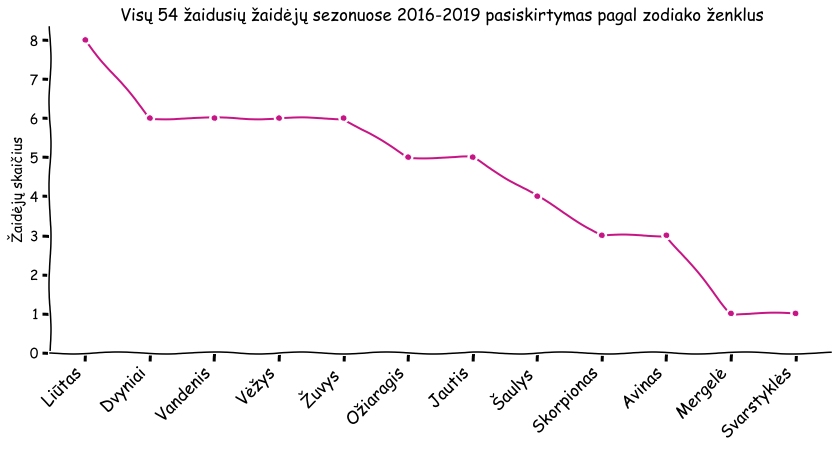

In [8]:
df_one = df_squad.copy()
df_one = df_one[['Name_Surname', 'Position', 'Zodiac_LT']]
df_one.drop_duplicates(subset=None, keep='first', inplace=True)
zodiac_counts = df_one["Zodiac_LT"].value_counts()

with plt.xkcd():
    plt.figure(figsize=(14,6))
    zodiac = sns.lineplot(data=zodiac_counts, marker='o', color='mediumvioletred', sort=False)
    zodiac.yaxis.grid(True)
    [plt.gca().spines[loc].set_visible(False) for loc in ['top', 'right']]
    plt.title(f'Visų {zodiac_counts.sum()} žaidusių žaidėjų sezonuose 2016-2019 pasiskirtymas pagal zodiako ženklus')
    plt.ylabel("Žaidėjų skaičius")
    zodiac.set_ylim(ymin=0)
    for item in zodiac.get_xticklabels():
        item.set_rotation(45)
    plt.xticks(ha='right',fontweight='light',fontsize='large')


**Įžvalga**: *Daugiausiai turėjome komandoje "liūtų", po vieną mažiau dvynių ir vėžių t.y. vasarą gimusių žaidėjų, ką reiškia daug gimtadienių vasaros metų. Gan netikėtai paaiškėjo kad turime/turėjome (nes per 2016-2019 metus keičiasi žaidėjai) tik po vieną svarstyklių bei mergelės zodiako ženklų.*

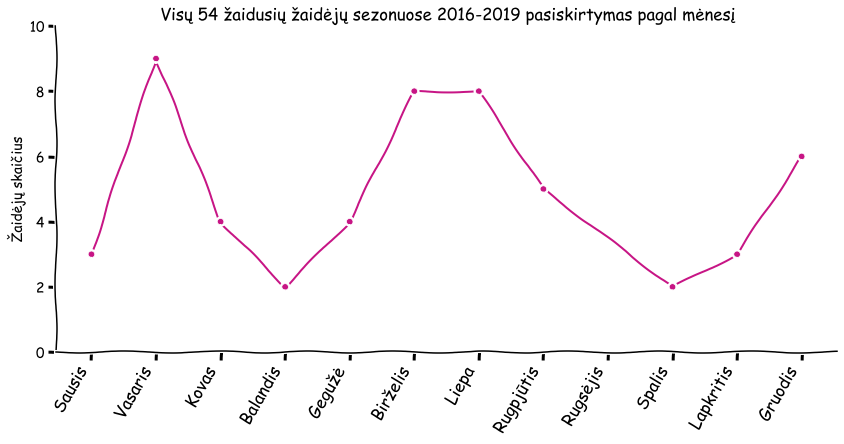

In [9]:
df_two = df_squad.copy()
df_two = df_two[['Name_Surname','Month']]
df_two.drop_duplicates(subset=None, keep='first', inplace=True)
month_counts = df_two["Month"].value_counts()
with plt.xkcd():
    plt.figure(figsize=(14,6))
    months = sns.lineplot(data=month_counts, marker='o', color='mediumvioletred')
    [plt.gca().spines[loc].set_visible(False) for loc in ['top', 'right']]
    plt.title(f'Visų {zodiac_counts.sum()} žaidusių žaidėjų sezonuose 2016-2019 pasiskirtymas pagal mėnesį')
    plt.ylabel("Žaidėjų skaičius")
    for item in months.get_xticklabels():
        item.set_rotation(60)
    months.set_ylim(ymin=0, ymax=10) 
    months.xaxis.set_ticks(np.arange(1, 13, 1))
    months.set_xticklabels(['Sausis', 'Vasaris', 'Kovas', 'Balandis', 'Gegužė', 'Birželis', 'Liepa', 'Rugpjūtis', 'Rugsėjis', 'Spalis', 'Lapkritis', 'Gruodis'], ha='right',fontweight='light',fontsize='large')

**Įžvalga**: *Kaip matome, FK TEC komandoje daugiau žaidėjų, gimusių pirmame pusmetyje, ypač metų pradžioje. Šitą faktą
taip pat pastėbi ir Malcolm Gladwell savo knygoje Outliers: The Story of Success.*

In [10]:
df_games = pd.read_csv(path_games, low_memory=False, na_filter=False,skip_blank_lines=True)
df_games = (df_games.drop(df_games.iloc[:, 11:95], axis=1))
df_games = df_games.drop([93,94])
df_games

,Data,Time,Tournament,Home_team,H_S,A_S,Away_team,Match_ID,TEC_result,Field_referee,Stadium
0,2016-04-17,20:00,SFL Cup,Viesulas 2,1,4,TEC,14468,won,Artūras Pipiras,Senvagės stadionas
1,2016-04-24,14:00,SFL League,Olimpija,3,2,TEC,14480,lost,Jurij Paškovskij,Fabijoniškių VFM stadionas
2,2016-04-30,18:00,SFL League,TEC,6,1,Naujieji Verkiai,14507,won,Robertas Valikonis,Senvagės stadionas
3,2016-05-07,15:00,SFL League,FKS Ukmergė,2,0,TEC,14540,lost,Robertas Valikonis,Ukmergės centrinis stadionas
4,2016-05-14,17:00,SFL League,GB United-Divenda,3,1,TEC,14566,lost,Darius Petraška,Kaišiadorių centrinis stadionas
...,...,...,...,...,...,...,...,...,...,...,...
88,2019-09-29,11:15,SFL League,Viltis B,0,2,TEC,20614,won,Kasparas Guobys,LFF stadionas
89,2019-10-05,10:05,SFL League,TEC,1,3,Ave.Ko.,20633,lost,Romualdas Cviklinskis,LFF stadionas
90,2019-10-14,20:15,SFL League,Futbolo Broliai,0,0,TEC,20652,draw,Jurij Paškovskij,Fabijoniškių VFM stadionas
91,2019-10-20,20:15,SFL League,TEC,2,4,Lentvaris,20670,lost,Roman Osipov,Senvagės stadionas


In [11]:
df_games_ref = df_games.copy()
df_games_ref = df_games_ref[['TEC_result', 'Field_referee']]
df_games_ref = df_games_ref.sort_values(['Field_referee','TEC_result']).reset_index(drop=True)

won_count = df_games_ref[df_games_ref['TEC_result'] == 'won'].Field_referee.value_counts().sort_values()
draw_count = df_games_ref[df_games_ref['TEC_result'] == 'draw'].Field_referee.value_counts().sort_values()
lost_count = df_games_ref[df_games_ref['TEC_result'] == 'lost'].Field_referee.value_counts().sort_values()
all_referees = df_games_ref.Field_referee.value_counts().index.to_frame().reset_index(drop=True).rename(columns={0: 'Field_referee'})

In [12]:
won_count = won_count.to_frame().reset_index().rename(columns={'index': 'Field_referee', 'Field_referee': 'Quantity_won'})
draw_count = draw_count.to_frame().reset_index().rename(columns={'index': 'Field_referee', 'Field_referee': 'Quantity_draw'})
lost_count = lost_count.to_frame().reset_index().rename(columns={'index': 'Field_referee', 'Field_referee': 'Quantity_lost'})
all_referees = pd.merge(pd.merge(pd.merge(all_referees, lost_count, how='left', on='Field_referee'),draw_count, how='left', on='Field_referee'),won_count,how='left', on='Field_referee')
all_referees.head(5)

,Field_referee,Quantity_lost,Quantity_draw,Quantity_won
0,Robertas Valikonis,3.0,2.0,5.0
1,Jurij Paškovskij,5.0,2.0,1.0
2,Dalius Ramanauskas,3.0,1.0,4.0
3,Nerijus Vasiliauskas,2.0,2.0,3.0
4,Artiom Gutovskij,4.0,NaN,2.0


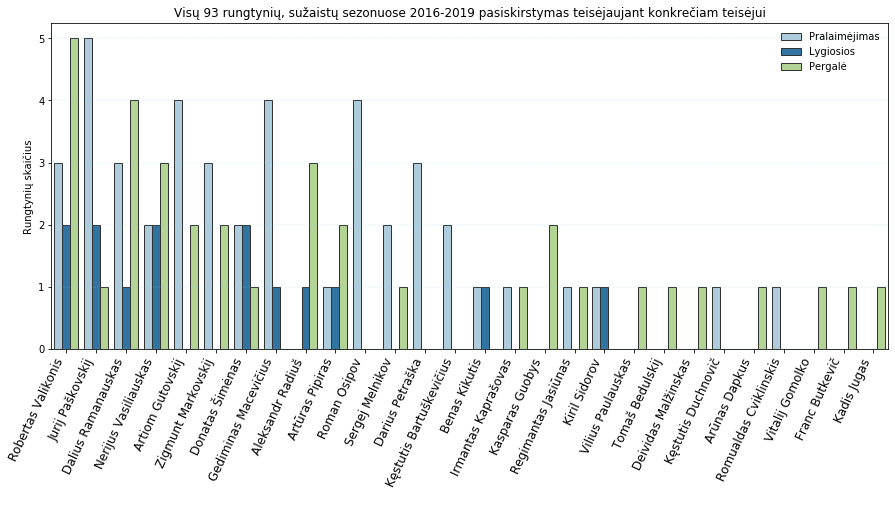

In [13]:
all_referees_melt = pd.melt(all_referees, id_vars='Field_referee')
game_count = won_count['Quantity_won'].sum() + draw_count['Quantity_draw'].sum() + lost_count['Quantity_lost'].sum()
plt.figure(figsize=(15,6))
lost_draw_won = sns.barplot(x='Field_referee', y='value', hue='variable', data=all_referees_melt, palette='Paired', edgecolor=".2")
for item in lost_draw_won.get_xticklabels():
    item.set_rotation(65)
plt.xticks(ha='right',fontweight='light',fontsize='large')

label_list = []
for t in lost_draw_won.get_legend_handles_labels():
    label_list.append(t)
lost_draw_won.legend(handles=label_list[0], labels=['Pralaimėjimas', 'Lygiosios', 'Pergalė'],loc='upper right', frameon=False)

lost_draw_won.set(xlabel=" ", 
                  ylabel="Rungtynių skaičius", 
                  title=f'Visų {game_count} rungtynių, sužaistų sezonuose 2016-2019 pasiskirstymas teisėjaujant konkrečiam teisėjui')
lost_draw_won.yaxis.grid(linestyle='--', linewidth='0.2', color='skyblue')

plt.show()

**Įžvalga**: *Nepalankiausias teisėjas yra Jurij Paškovskij: 5 pralaimėjimai iš 8 rungtynių, Romanas Osipovas: 4 iš 4 pralaimėjimai bei Darius Petraška: 3 iš 3. Daugiausiai laimėta teisėjaujant Robertui Valikoniui (5/10), Daliui Ramanauskui (4/8), bei Aleksandrui Radiuš (3/4).*

In [14]:
df_games_stadium = df_games.copy()
df_games_stadium_senvage = df_games_stadium[['TEC_result', 'Stadium']].loc[df_games_stadium['Stadium'].str.contains('Senvagės stadionas')]
won_senvage = df_games_stadium_senvage[df_games_stadium_senvage['TEC_result'] == 'won'].Stadium.value_counts()
draw_senvage = df_games_stadium_senvage[df_games_stadium_senvage['TEC_result'] == 'draw'].Stadium.value_counts()
lost_senvage = df_games_stadium_senvage[df_games_stadium_senvage['TEC_result'] == 'lost'].Stadium.value_counts()

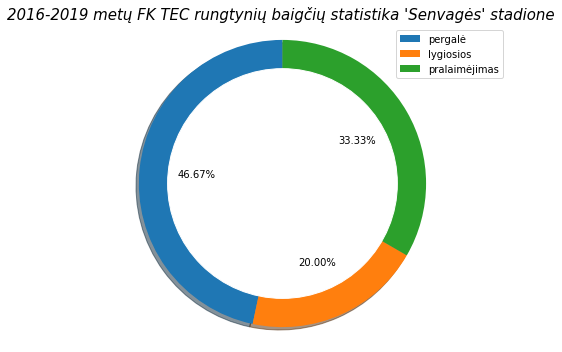

In [15]:
pie_plot = pd.DataFrame(index=[['won','draw','lost']],data=[won_senvage[0],draw_senvage[0],lost_senvage[0]], columns=['Senvagės stadionas'])
plt.figure(figsize=(8,5))
pie = plt.pie(pie_plot['Senvagės stadionas'], shadow=True, startangle=90, autopct='%1.2f%%')
plt.legend(labels=['pergalė','lygiosios','pralaimėjimas'], loc="best")
plt.axis('equal')
plt.title(label="2016-2019 metų FK TEC rungtynių baigčių statistika 'Senvagės' stadione", 
          fontsize=15,
         fontstyle='italic') 
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.tight_layout()
my_circle=plt.Circle( (0,0), 0.8, color='white')
plt.gca().add_artist(my_circle)
plt.show(block=False)

**Įžvalga**: *Kas trečios "namų" rungtynės komanda pralaimi, kas penktos sužaidžia lygiosiomis.*

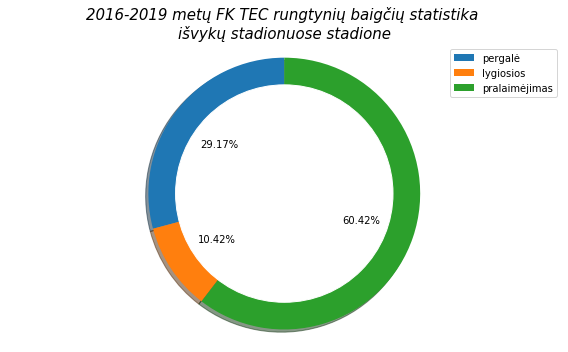

In [16]:
df_games_stadium_not_senvage = df_games_stadium[['TEC_result', 'Stadium']].loc[~df_games_stadium['Stadium'].str.contains('Senvagės stadionas')]

won_draw_lost(df_games_stadium_not_senvage)
pie_plot_2 = pd.DataFrame(index=[['won','draw','lost']],data=[won_draw_lost(df_games_stadium_not_senvage)[0],
                                                              won_draw_lost(df_games_stadium_not_senvage)[1],
                                                              won_draw_lost(df_games_stadium_not_senvage)[2]], 
                                                              columns=['Išvykos stadionai'])
plt.figure(figsize=(8,5))
pie = plt.pie(pie_plot_2['Išvykos stadionai'], shadow=True, startangle=90, autopct='%1.2f%%')
plt.legend(labels=['pergalė','lygiosios','pralaimėjimas'], loc="best")
plt.axis('equal')
plt.title(label='''2016-2019 metų FK TEC rungtynių baigčių statistika 
išvykų stadionuose stadione''', 
          fontsize=15,
         fontstyle='italic') 
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.tight_layout()
my_circle=plt.Circle( (0,0), 0.8, color='white')
plt.gca().add_artist(my_circle)
plt.show(block=False)

**Įžvalga**: *Išvykose FK TEC pralaimi beveik kas 2 iš 3 rungtynių.*

In [17]:
df_statistics = pd.read_csv(path_statistics, low_memory=False)
df_statistics = df_statistics[['Season','Action','Player','Minute']]
df_squad_goals = df_statistics.loc[(df_statistics['Action'] == 'goal') | (df_statistics['Action'] == 'goal (11m)')]
df_squad_y_cards = (df_statistics[df_statistics['Action'].str.contains('yellow')])
df_squad_goals

,Season,Action,Player,Minute
0,2016,goal,Domantas Gegevičius,4.0
1,2016,goal,Aurimas Baubkus,7.0
2,2016,goal,Domantas Gegevičius,25.0
5,2016,goal,Aurimas Tamulionis,84.0
6,2016,goal,Rokas Kulys,36.0
...,...,...,...,...
369,2019,goal,Vytautas Žičius,27.0
372,2019,goal,Ugnius Juozaitis,51.0
375,2019,goal,Vytautas Žičius,24.0
376,2019,goal,Arminas Vaskela,28.0


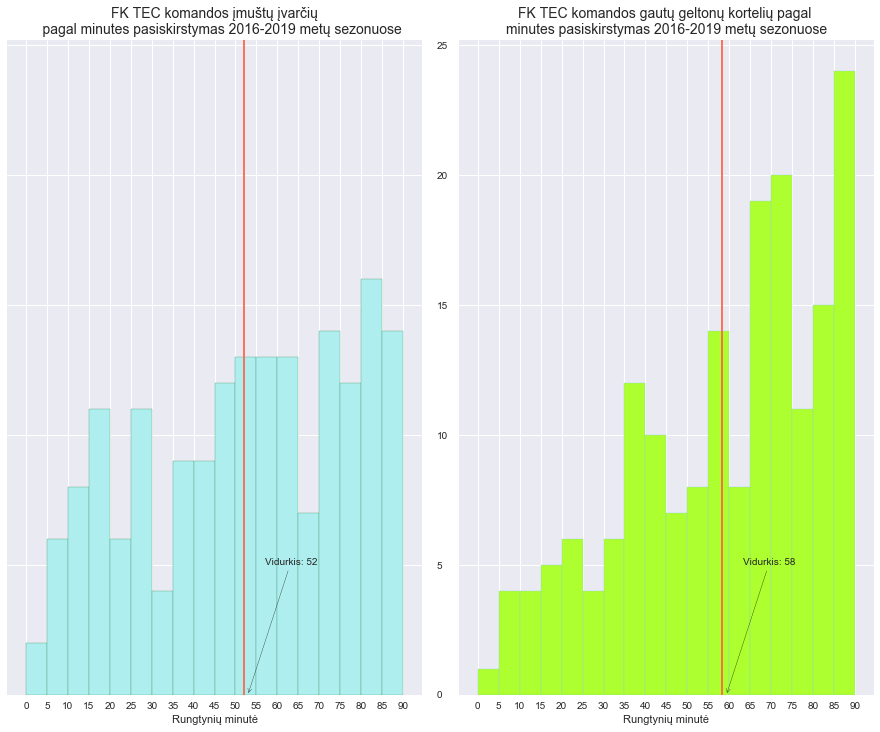

In [18]:
plt.style.use('seaborn')
rcParams['figure.figsize'] = 12.7,10.27
fig, axs = plt.subplots(1, 2, sharey=True, sharex=False, tight_layout=True)

axs[0].hist(df_squad_goals['Minute'], bins=np.arange(0,91,5),  orientation='vertical',  color = "paleturquoise", ec="seagreen")
axs[0].axvline(x = df_squad_goals.Minute.mean(), zorder=1, color='tomato')
axs[0].set_xticks(np.arange(0,91,5))
axs[0].tick_params(axis='y',labelsize=10, pad=15)
axs[0].annotate("Vidurkis: " + str(round(df_squad_goals.Minute.mean())), xy=(df_squad_goals.Minute.mean()+1, 0),xytext=(df_squad_goals.Minute.mean()+5, 5), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),)
axs[0].set_title('''FK TEC komandos įmuštų įvarčių
    pagal minutes pasiskirstymas 2016-2019 metų sezonuose''', fontsize=14)
axs[0].yaxis.tick_right()
axs[0].set_xlabel('Rungtynių minutė')

axs[1].hist(df_squad_y_cards['Minute'], bins=np.arange(0,91,5), orientation='vertical',  color = "greenyellow", ec="skyblue")
axs[1].axvline(x = df_squad_y_cards.Minute.mean(), zorder=1, color='tomato')
axs[1].set_xticks(np.arange(0,91,5))
axs[1].annotate("Vidurkis: " + str(round(df_squad_y_cards.Minute.mean())), xy=(df_squad_y_cards.Minute.mean()+1, 0),xytext=(df_squad_y_cards.Minute.mean()+5, 5), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),)
axs[1].set_title(
    '''FK TEC komandos gautų geltonų kortelių pagal 
minutes pasiskirstymas 2016-2019 metų sezonuose''', fontsize=14)
axs[1].set_yticks(np.arange(0,26,5))
axs[1].set_xlabel('Rungtynių minutė')

plt.show()

**Įžvalga**: *Įvarčio vidutiniškai reikia laukti 52-ą minutę, geltoną kortelę apie 58-ą minutė. Dar pastėbimas padidėjas geltonų kortelių kiekis nuo 65 minutės, kas gali sąlyguoti žaidėjų pavargimą ir, ko pasėkoje, daromos klaidos kurios ištaisomos pražangomis.*

In [19]:
df_attendance = pd.read_csv(path_attendance, low_memory=False)
df_attendance_start = (df_attendance[df_attendance['Name_Surname'].str.contains('[startas]',regex=False)]).Name_Surname.value_counts()
df_attendance_subs = (df_attendance[~df_attendance['Name_Surname'].str.contains('[startas]',regex=False)]).Name_Surname.value_counts()
df_attendance_subs = df_attendance_subs.to_frame().reset_index().rename(columns={"index": "Player",
                                                                           "Name_Surname": "Played from subs"})

df_attendance_top30 = df_attendance_start.iloc[np.arange(0,30)].to_frame().reset_index().rename(columns={"index": "Player",
                                                                           "Name_Surname": "Played in starting 11"})
top30_names = []
for i in range(len(df_attendance_top30.index)):
    top30_names.append(df_attendance_top30.Player[i][0:(df_attendance_top30.Player[i].find(' ['))])
df_attendance_top30['Player'] = top30_names

df_attendance_top30 = pd.merge(df_attendance_top30, df_attendance_subs, how='outer', on='Player').iloc[np.arange(0,30)].fillna(0)

def percentage(source):
    percentage = round(df_attendance_top30[source] / (df_attendance_top30['Played in starting 11'] + df_attendance_top30['Played from subs']),4) * 100
    return percentage

df_attendance_top30['% (of played in starting 11)'] = percentage('Played in starting 11')
df_attendance_top30['% (of played from subs)'] = percentage('Played from subs')

df_attendance_top30['Overall played games'] = df_attendance_top30['Played in starting 11'] + df_attendance_top30['Played from subs']
df_attendance_top30['% (of all 89 team played games)'] = round(df_attendance_top30['Overall played games'] / len(df_attendance['Match_ID'].unique()),4) * 100

cols = list(df_attendance_top30.columns.values)
df_attendance_top30 = df_attendance_top30[cols[0:2] + [cols[3]] + [cols[2]] + cols[4:]]
df_attendance_top30.head(6)

,Player,Played in starting 11,% (of played in starting 11),Played from subs,% (of played from subs),Overall played games,% (of all 89 team played games)
0,Vytautas Žičius,82.0,98.80,1.0,1.20,83.0,93.26
1,Paulius Lekarevičius,68.0,100.00,0.0,0.00,68.0,76.40
2,Tadas Jacinavičius,65.0,94.20,4.0,5.80,69.0,77.53
3,Aurimas Baubkus,60.0,90.91,6.0,9.09,66.0,74.16
4,Ernestas Karsten,56.0,71.79,22.0,28.21,78.0,87.64
5,Justas Macidulskas,44.0,97.78,1.0,2.22,45.0,50.56


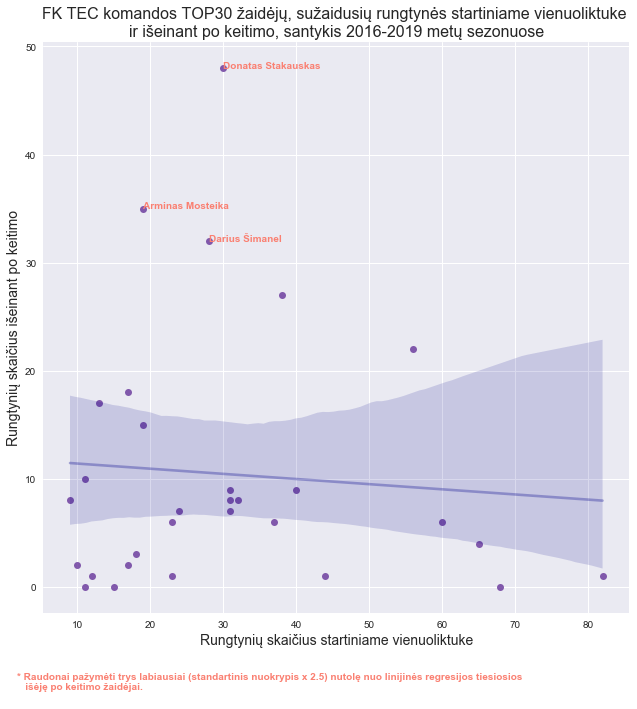

In [20]:
f, ax = plt.subplots(figsize=(10.5, 10.5))
sns.despine()
sns.regplot(x="Played in starting 11", y="Played from subs",
                data=df_attendance_top30, ax=ax, color='rebeccapurple', marker="o", line_kws={'color': 'darkblue', 'alpha': 0.3})

plt.title('''FK TEC komandos TOP30 žaidėjų, sužaidusių rungtynės startiniame vienuoliktuke 
ir išeinant po keitimo, santykis 2016-2019 metų sezonuose''', fontsize=16)
plt.ylabel('Rungtynių skaičius išeinant po keitimo', fontsize=14)
plt.xlabel('Rungtynių skaičius startiniame vienuoliktuke', fontsize=14)

for line in range(0,df_attendance_top30.shape[0]):
    if df_attendance_top30['Played from subs'][line] > np.std(df_attendance_top30['Played from subs'])*2.5:
        ax.text(df_attendance_top30['Played in starting 11'][line], df_attendance_top30['Played from subs'][line], horizontalalignment='left', s=df_attendance_top30['Player'][line], color= 'salmon', weight='semibold', label = df_attendance_top30['Player'][line])
    else:
        pass
plt.figtext(.09, .01,("\n"*4) +  """* Raudonai pažymėti trys labiausiai (standartinis nuokrypis x 2.5) nutolę nuo linijinės regresijos tiesiosios
   išėję po keitimo žaidėjai.\n""", color='salmon', weight='heavy' )   
plt.show()

**Įžvalga**: *Kas iš vienos pusės ir logiška, kuo daugiau žaista startiniame vienuoliktuke, tuo mažiau rungtynių pradėta nuo atsarginio suolo (ir atvirksčiai), tačiau žinant mėgėjiško futbolo ypatumus, t.o galimybė daryti kiek nori keitimų, susirinkimo/vėlavimo į rungtynės problemas, matome kad koreliacija yra labai prasta (pagal corr(): ~-0,05). Trys žaidėjai, nutolę daugiau nei 2,5 karto nuo standartinio nuokrypio, yra būtėnt tie, kurie ganėtinai pavyzdingai lanko rungtynės bet yra pirmos eilės atsarginiai.*

In [21]:
df_subs = pd.read_csv(path_attendance, low_memory=False)
df_stats = pd.read_csv(path_statistics, low_memory=False)
df_subs = (df_subs[~df_subs['Name_Surname'].str.contains('[startas]',regex=False)]).dropna()

In [22]:
df_stats = df_stats[['Season', 'Month', 'Match_ID']]
df_stats = df_stats.set_index('Match_ID')
df_stats = df_stats.loc[~df_stats.index.duplicated(keep='first')].reset_index()
df_stats = pd.merge(df_stats, df_subs, how='left', on='Match_ID')

In [23]:
filt_dns_games = (df_stats['Match_ID'] == 20327) | (df_stats['Match_ID'] == 20580) | (df_stats['Match_ID'] == 17057)
filt_dns_games_list = df_stats.loc[filt_dns_games,'Match_ID'].index.to_list()
df_stats = df_stats.drop(filt_dns_games_list)
df_stats

,Match_ID,Season,Month,Name_Surname
0,14468,2016,April,Robert Choruzij
1,14468,2016,April,Kęstutis Panka
2,14468,2016,April,Darius Šimanel
3,14468,2016,April,Darius Baltiejus Jr
4,14468,2016,April,Miguel Gil Mast
...,...,...,...,...
405,20670,2019,October,Alvinas Dūdėnas
406,20689,2019,October,Ernestas Karsten
407,20689,2019,October,Darius Šimanel
408,20689,2019,October,Matas Juodelis


In [24]:
def subs_counter(season):
    df_stats_season = df_stats[df_stats['Season'] == season]
    df_stats_season_match_values = df_stats_season['Match_ID'].value_counts(sort=False).to_frame().reset_index().rename(columns={
                                                                        "index": "Match_ID","Match_ID": "Substitutions"})
    df_stats_season_match_values = df_stats_season_match_values.sort_values(by='Match_ID')
    df_stats_season = df_stats_season.set_index('Match_ID')
    df_stats_season = df_stats_season.loc[~df_stats_season.index.duplicated(keep='first')].drop('Name_Surname',axis=1).reset_index()
    df_stats_season = pd.merge(df_stats_season, df_stats_season_match_values, how='left', on='Match_ID')
    return df_stats_season

In [25]:
df_stats_2016 = subs_counter(2016)
df_stats_2017 = subs_counter(2017)
df_stats_2018 = subs_counter(2018)
filt_2018 = (df_stats_2018['Match_ID'] == 18431) | (df_stats_2018['Match_ID'] == 18403) | (df_stats_2018['Match_ID'] == 18781)
df_stats_2018.loc[filt_2018,'Substitutions'] = 0
df_stats_2019 = subs_counter(2019)
df_stats_2016_2019 = [df_stats_2016, df_stats_2017, df_stats_2018, df_stats_2019]
df_subs_2016_2019 = pd.concat(df_stats_2016_2019)
df_subs_2016_2019
month_dict = {'April': 'Balandis','May': 'Gegužė','June': 'Birželis', 'July': 'Liepa',
              'August':'Rupgjūtis','September': 'Rugsėjis','October': 'Spalis'}
df_subs_2016_2019['Month_LT'] = list(map(lambda x: month_dict[x], df_subs_2016_2019['Month']))
df_subs_2016_2019

,Match_ID,Season,Month,Substitutions,Month_LT
0,14468,2016,April,10,Balandis
1,14480,2016,April,8,Balandis
2,14507,2016,April,3,Balandis
3,14540,2016,May,3,Gegužė
4,14566,2016,May,4,Gegužė
...,...,...,...,...,...
16,20614,2019,September,3,Rugsėjis
17,20633,2019,October,5,Spalis
18,20652,2019,October,6,Spalis
19,20670,2019,October,6,Spalis


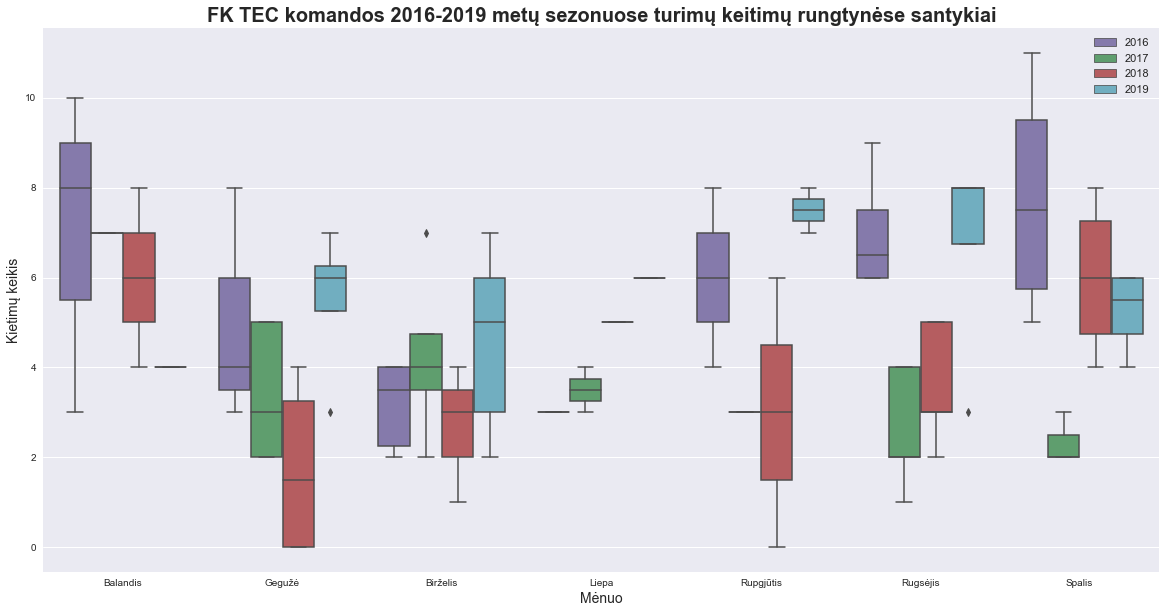

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
sns.set(style="ticks")
sns.boxplot(x="Month_LT", y="Substitutions",
            hue="Season", palette=["m", "g","r", "c"],
            data=df_subs_2016_2019)
plt.ylabel('Kietimų keikis', fontsize=14)
plt.xlabel('Mėnuo', fontsize=14)
plt.legend()
plt.title('FK TEC komandos 2016-2019 metų sezonuose turimų keitimų rungtynėse santykiai', fontsize=20, weight='heavy')
plt.show()

**Įžvalga**: *Daugiausia keitimų pradžioje ir pabaigoje sezono, ko priežastis yra vasara ir žaidėjų atostogos. Dar pabrėžtinas momentas, jog sezone 2018 negausus atsarginių skaičius galėjo lemti/prisidėti/sąlyguoti komandos iškritimą į žėmesnę lygą.*

In [27]:
df_stadiums = pd.read_csv(path_stadiums, low_memory=False)
df_stadiums

,Stadium,Address,Lat,Long
0,Senvagės stadionas,"Širvintų g. 80, Vilnius, Lithuania",54.711832,25.280244
1,Fabijoniškių VFM stadionas,"P. Žadeikos g. 2, Vilnius, Lithuania",54.732413,25.239282
2,Ukmergės centrinis stadionas,"Gruodžio 17-osios g. 52, Ukmergė, Lithuania",55.250576,24.786006
3,Kaišiadorių centrinis stadionas,"Gedimino g.118, Kaišiadorys, Lithuania",54.856227,24.438132
4,Naujosios Vilnios stadionas,"Pergalės g. 34A, Vilnius, Lithuania",54.684804,25.413873
5,Fanų stadionas,"Linkmenų g. 8, Vilnius, Lithuania",54.702878,25.269054
6,Panerio stadionas,"Bukčių g. 8a, Vilnius, Lithuania",54.664580,25.212714
7,LFF stadionas,"Stadiono g. 2, Vilnius, Lithuania",54.668516,25.294715
8,Nemenčinės stadionas,"Neries g. 29, Nemenčinė, Lithuania",54.840872,25.476927
9,Pabradės stadionas,"Vilniaus g. 20a, Pabradė, Lithuania",54.981306,25.769617


In [28]:
import math
import folium
from folium import Marker
from folium.plugins import MarkerCluster

In [29]:
m_1 = folium.Map(location=[54.7115656,25.2763738], tiles='cartodbpositron', zoom_start=9)

In [30]:
mc = MarkerCluster()
for idx, row in df_stadiums.iterrows():
    if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
        mc.add_child(Marker([row['Lat'], row['Long']]))
m_1.add_child(mc)

**Įžvalga**: *Pavaizduoti visi 16  futbolo stadionai, kuriuose žaidė 2016-2019 metais FK TEC komanda, beveik pusė (7/16) iš kurių įsikūrę Vilniuje.*